# Exploratory Data Analysis - Palmer Archipelago (Antarctica) penguin data

## Title : Palmer Archipelago Penguin Data

> Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network 
The data folder contains two CSV files
1. penguins_size.csv: Simplified data from original penguin data. sets.Contains variables:
2. penguins_lter.csv: Original combined data for 3 penguin species (aggregated from individual links below) :

## Attribute Information:
* studyName: Sampling expedition from which data were collected,generated, etc.
* Sample Number - continuous numberng sequence for each sample
* species: penguin species (Chinstrap, Adélie, or Gentoo)
* Region - Nominal region of Palmer LTER sampling grid
* Region - Nominal region of Palmer LTER sampling grid
* Island - Island near Palmer Station where samples were collected.-(Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* Stage -  Reproductive stage at sampling
* Individual ID - A unique ID for each individual in dataset
* Clutch Completion - Was the study nest observed with a full clutch, i.e., 2 eggs.
* Date Egg - Date study nest observed with 1 egg (sampled)
* culmen_length_mm: length of the dorsal ridge of a bird's bill - culmen length (mm)
* culmen_depth_mm: depth of the dorsal ridge of a bird's bill-culmen depth (mm)
* flipper_length_mm: Length of flipper - flipper length (mm)
* body_mass_g: body mass (g) - Mass of body
* sex: penguin sex - code for the sex of an animal	
* Delta 15N - a measure of the ratio of stable isotopes 15N:14N
* Delta 13C - a measure of the ratio of stable isotopes 13C:12C
* Comment - Text field to provide additional relevant information for data

## Import Libraries and load Data

In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

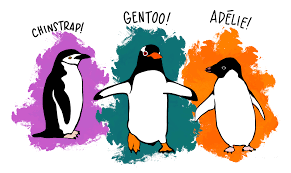

In [72]:
display.Image('download.png',width=600,height=300)

In [285]:
penguins_size = pd.read_csv('penguins_size.csv')

In [286]:
# viewing the data in penguin iter
penguins_size.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [287]:
penguins_size.shape

(344, 7)

> Observations :
   1. The CSV file contains 344 rows and 17 columns

In [288]:
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


> Observations:
   1. There are some missing values in (Culmen length,Culmen Depth,Filpper Length,Body mass,sex)
   2. There are 4 float values , one integer and 3 objects/strings

In [ ]:
#Droping all missing values
penguins_size.dropna(subset=penguins_size.columns[:6],inplace=True)

In [290]:
penguins_size.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


> Observations :
  There are 344 samples in this data set

In [291]:
penguins_size['species'].value_counts()

Adelie       151
Gentoo       123
Chinstrap     68
Name: species, dtype: int64

> Observations:
   1. Out of 344 penguins , 152 penguins are Adelie,124 are Gentoo and 68 Chinstrap.
   2. The data is Balanced

In [292]:
adelie_sp =  penguins_size[penguins_size['species']=='Adelie']
adelie_sp.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [293]:
gentoo_sp =  penguins_size[penguins_size['species']=='Gentoo']
gentoo_sp.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [294]:
chinstrap_sp =  penguins_size[penguins_size['species']=='Chinstrap']
chinstrap_sp.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


> ### Observations :
   1. An average Gentoo species is heavier(5076g) than both Adelie and Chistrap which are 3700g and 3733g respectively.
   > Gentoo > Chinstrap > Adelie
   2. According to the data Gentoo's have a longer Flipper Length of 217mm, whiles Adelie and Chinstrap have 189mm and 195mm. 
   > Gentoo > Chinstrap > Adelie
   3. An Average Chinstrap has a longer Bill/Beak of 48mm (Culmen Length) and the other species who have 47mm for Gentoo and 38mm for Adelie
   > Chinstrap > Gentoo > Adelie
   4. An Average Chinstrap and Adele both have wider Bill ridge of 18mm (Culmen depth) than a Gentoo which is 14mm
   > Chinstrap == Gentoo > Adelie

## `Flipper Length`

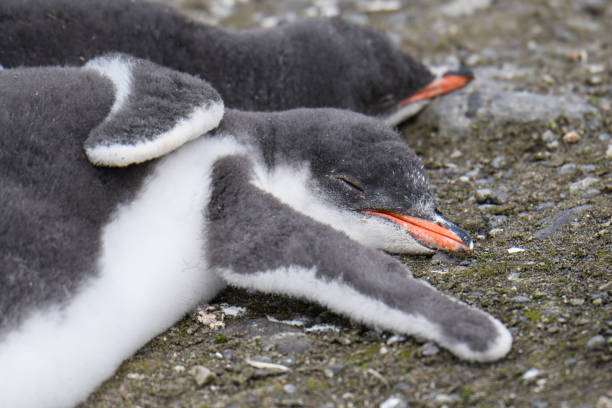

In [76]:
display.Image('flipper.jpg')

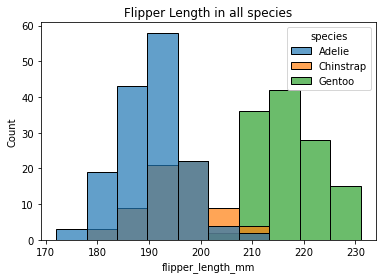

In [295]:
sns.histplot(penguins_size,x='flipper_length_mm',hue='species',alpha=.7).set(title='Flipper Length in all species');

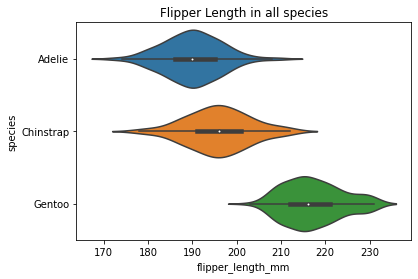

In [296]:
# voilin plot is basically gives you the hisplot and extra details about the data.
sns.violinplot(y=penguins_size['species'],x=penguins_size['flipper_length_mm']).set(title='Flipper Length in all species');

> Observation :
   1. if a penguin's flipper length is between 210 - 230 mm then its more likely a Gentoo.
   2. When a penguins flipper lenght is between 200 - 215 mm it could be a Chinstrap specie.
   3. if a penguins flipper length is between 172 to 200 then its likely Adelie

## `Culmen Length and depth`

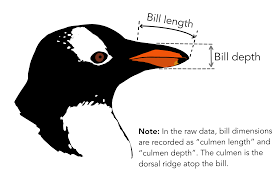

In [109]:
display.Image('bill.png',width=500,height=350)

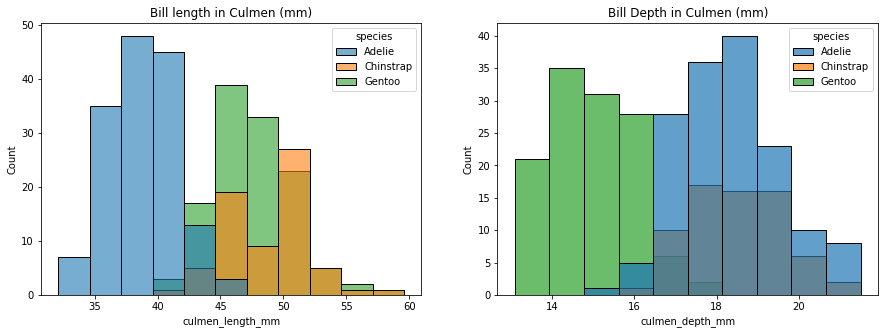

In [297]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

ax1.set(title='Bill length in Culmen (mm)')
sns.histplot(penguins_size,x='culmen_length_mm',ax=ax1,hue='species',alpha=.6);

ax2.set(title='Bill Depth in Culmen (mm)')
sns.histplot(penguins_size,x='culmen_depth_mm',ax=ax2,hue='species',alpha=.7);

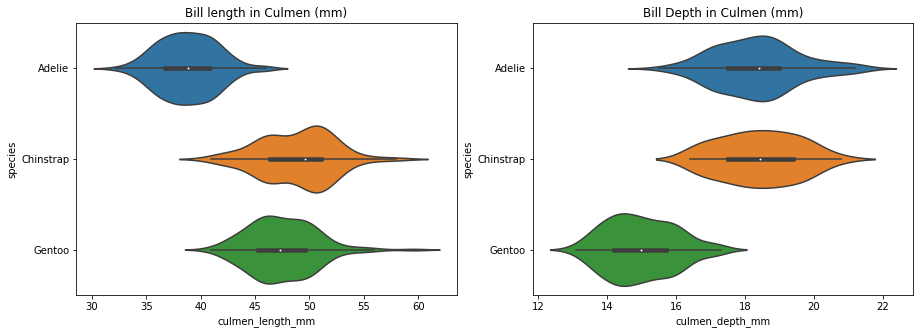

In [298]:
# Voilin Plots 
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
ax1.set(title='Bill length in Culmen (mm)')
sns.violinplot(y=penguins_size['species'],x=penguins_size['culmen_length_mm'],ax=ax1);

ax2.set(title='Bill Depth in Culmen (mm)')
sns.violinplot(y=penguins_size['species'],x=penguins_size['culmen_depth_mm'],ax=ax2);


> Observations : 
  * A penguin is more likely to be a Adelie if its culmen length is between 32-38mm and also a penguins culmen length between 40-55 has a 50/50 chance of been a Gentoo or an Chinstrap.
  * Also a penguin is more likely a gentoo when when its culment depth is between 13-15mm and from 15-16 is more likely a Adelie and also 50/50 change of it been a Chistrap or adelie when its between 16-21mm

## `Body Mass`

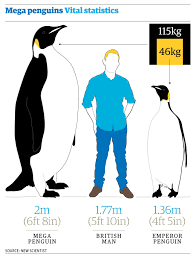

In [148]:
display.Image('mass.png',width=400,height=400)

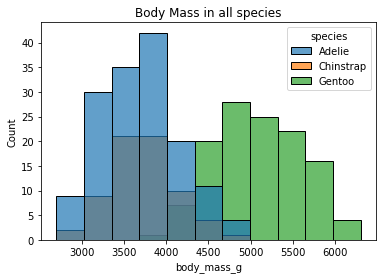

In [299]:
sns.histplot(penguins_size,x='body_mass_g',hue='species',alpha=.7).set(title='Body Mass in all species');

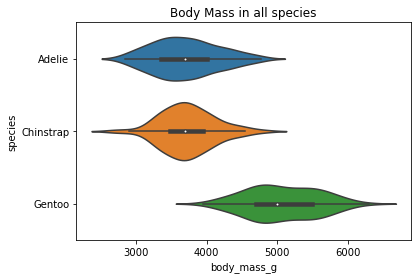

In [300]:
sns.violinplot(y=penguins_size['species'],x=penguins_size['body_mass_g']).set(title='Body Mass in all species');

> Observations:
  * Theres a high chance a penguin with a body mass between 4600-6500g is Gentoo and theres a 50/50 chance of a penguin with body mass between 2500-4600g is been either an Adelie or a Chistrap.

` What body mass of based on sex (Female/Male)`

In [301]:
penguins_size['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

> Observations : 
    We can see that there missing values in the Sex Column.

In [302]:
# Handling the missing values in Sex columns
penguins_size.loc[penguins_size['sex']=='.',['sex']] = np.nan

In [303]:
## dropping all missing values
penguins_size.dropna(subset=['sex'],inplace=True)

In [304]:
## Missing values handled
penguins_size['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

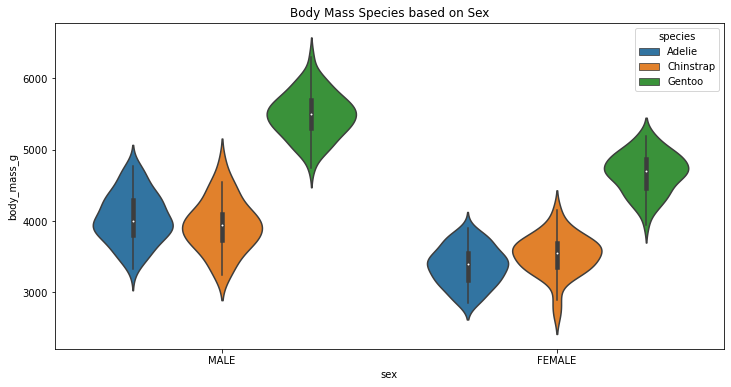

In [305]:
fig,ax = plt.subplots(figsize=(12,6))
sns.violinplot(y='body_mass_g',x='sex',data=penguins_size,hue='species').set(title='Body Mass Species based on Sex');

> Observations :
   1. Based on the graph above males penguins are generally heavier than female
   2. Gentoo male penguins are the heaviest of in both sex and also Gentoo female are the heaviest female species. 

### `Island`

* Which part of island are a particular speices found ?

* Which sex is mostly found in which Island?

In [306]:
penguins_size['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

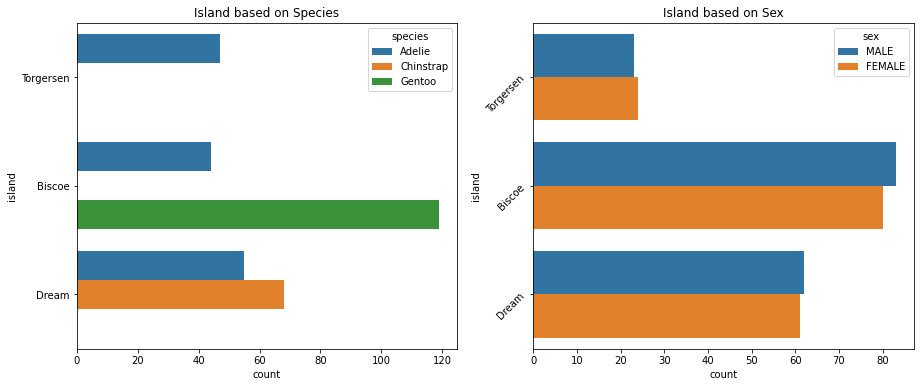

In [307]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
plt.yticks(rotation=45)

ax1.set(title='Island based on Species')
sns.countplot(y='island',data=penguins_size,hue='species',ax=ax1)

ax2.set(title='Island based on Sex')
sns.countplot(y='island',data=penguins_size,hue='sex',ax=ax2);

> Observations :
   1. All species are not found on one Island.
   2. Only Adelies are found in Torgensen Island.
   3. Chinstraps are not on Biscoe Island.
   4. Gentoos are also not on Dream Island.
   5. Based on the data most species are found in the Biscoe Island.
   6. Torgersen have a small number of penguins inhabitant.

In [308]:
penguins_size.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 28.9+ KB


` Culmen Length V Culmen Depth`

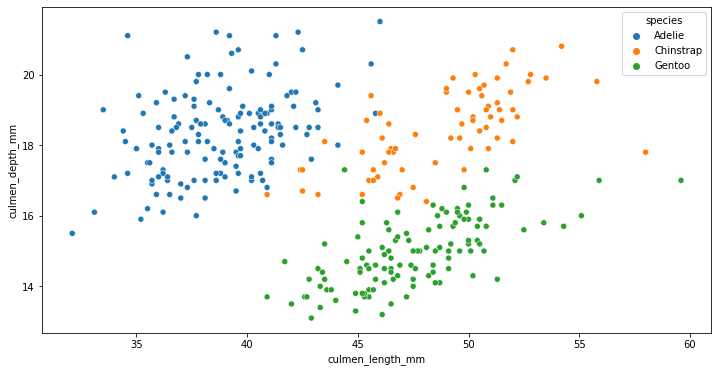

In [309]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=penguins_size,x='culmen_length_mm',y='culmen_depth_mm',hue='species');

> Observations:
   1. Penguins with 16mm or more culmen depth mm who have a culmen length less than 40mm are more likely an Adelie.
   2. Also penguins with less than 16mm of culmen depth who have a culmen length more than 40mm are more likely to be a gentoo.
   3. Penguins with 16mm or more culmen depth mm who have a culmen length more than 40mm are more likley a Chinstrap. 

In [311]:
## Normalizing culmen length, depth and flipper and body mass
penguins_size ['log_flipper_length_mm'] = np.log10(penguins_size['flipper_length_mm'])
penguins_size ['log_culmen_length_mm'] = np.log10(penguins_size['culmen_length_mm'])
penguins_size ['log_culmen_depth_mm'] = np.log10(penguins_size['culmen_depth_mm'])
penguins_size ['log_body_mass_g'] = np.log10(penguins_size['body_mass_g'])

# Drop non-transformed
penguins_size.drop(columns=['flipper_length_mm','culmen_length_mm',
                            'culmen_depth_mm','body_mass_g'],inplace=True)


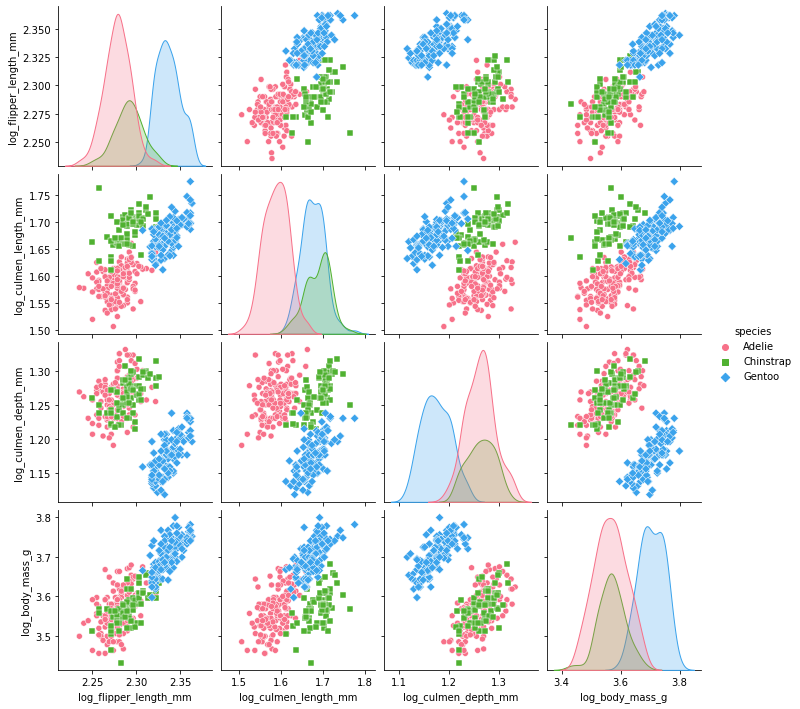

In [312]:
sns.pairplot(penguins_size,hue='species',palette='husl',markers=['o','s','D']);

> Observations 
   1. We can see that Body mass and Flipper length are positively correlated, showing that Gentoos have a longer Flipper length and also heavier body mass.
   2. Culmen length and Flipper also positively correlated, adelies have shorter flippers and shorter culmen lengths.

## `Conclusions`
   1. For a penguin to be a Gentoo, it should a has body mass comparatively heavier than all spieces and a longer Flipper length greater but a shorter culmen depth and alo found in the Biscoe islands only.
   2. Also a Adelie penguins, more likely has relatively shorter Culmen length and and longer culmen depth and can be found in all Islands.
   3. For Chinstrap, a relatively longer length of both culmen length and culmen depth and only found on the Dream Islands.